![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


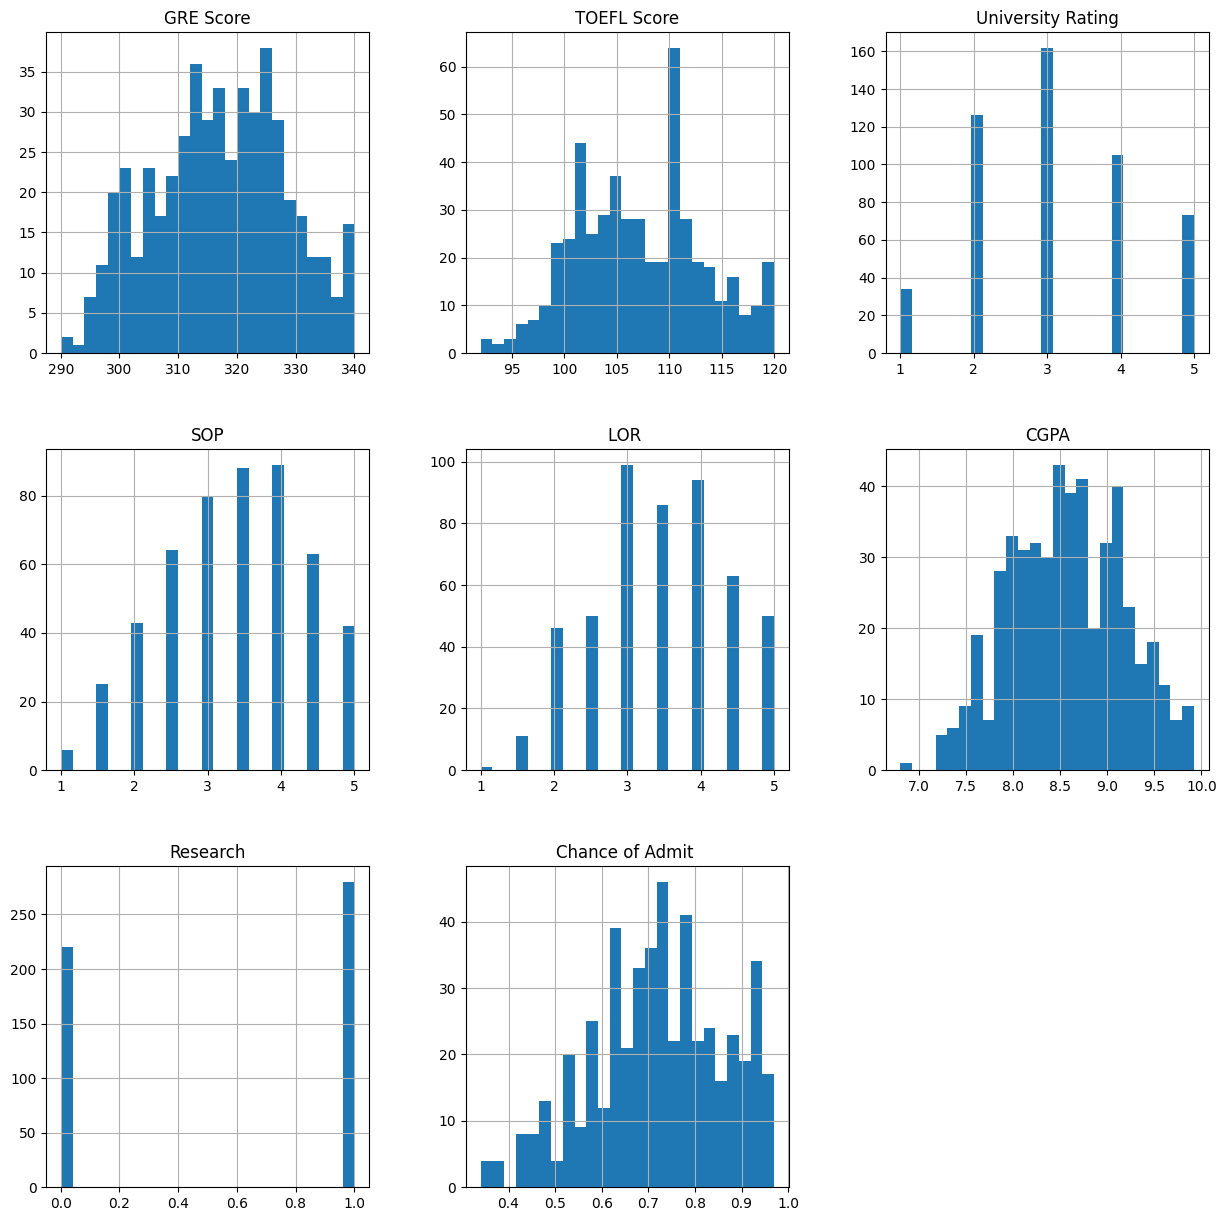

In [4]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [5]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [6]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [7]:
# Celda 1
# Preprocesamiento de datos
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler


# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)

X_train = np.array(X_train)
Y_train = np.array(yTrain)

X_test = np.array(X_test)
Y_test = np.array(yTest)

# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

# Red neuronal de una capa
K.clear_session()
output_var = 1
# Definición red neuronal con la función Sequential()
model_1layer = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_1layer.add(Dense(output_var, input_shape=(dims,)))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_1layer.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Impresión de la arquitectura de la red neuronal
print(model_1layer.summary())

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model_1Layer.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

7 input variables
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


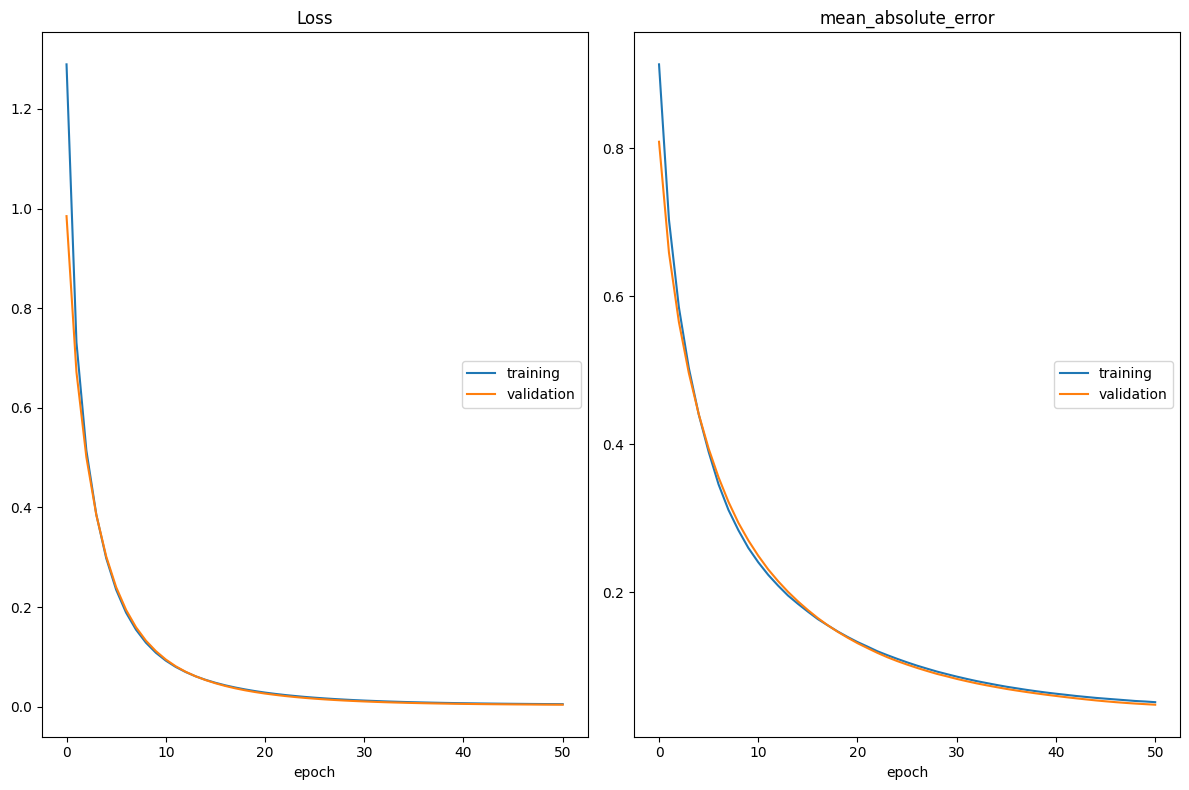

Loss
	training         	 (min:    0.005, max:    1.289, cur:    0.005)
	validation       	 (min:    0.004, max:    0.985, cur:    0.004)
mean_absolute_error
	training         	 (min:    0.052, max:    0.913, cur:    0.052)
	validation       	 (min:    0.048, max:    0.809, cur:    0.048)
11/11 [==============================] - 0s 21ms/step - loss: 0.0049 - mean_absolute_error: 0.0517 - val_loss: 0.0039 - val_mean_absolute_error: 0.0483
Epoch 51: early stopping


In [8]:
# Entrenamiento de la red neuronal con 100 épocas y early stopping
model_1layer.fit(X_train, Y_train, 
          verbose=True, 
          epochs=100,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

5/5 [==============================] - 0s 461us/step
RMSE: 0.062085054275049706
MAE: 0.048332519594828295


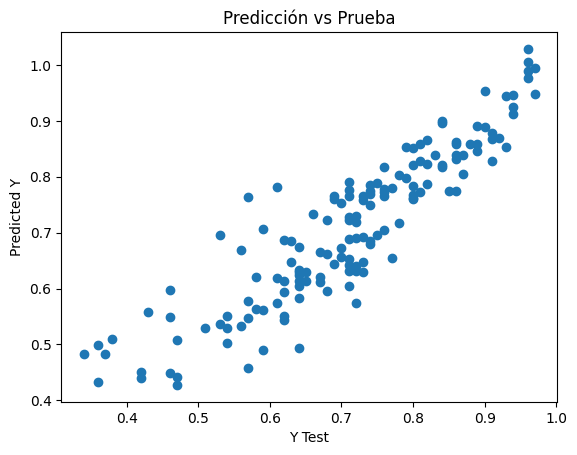

In [9]:
y_pred = model_1layer.predict(X_test)

# Calcular RMSE
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

# Calcular MAE
print('MAE:', mean_absolute_error(Y_test, y_pred))

# Plot predicted vs actual
plt.scatter(Y_test, y_pred)
plt.title('Predicción vs Prueba')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

Para el entrenamiento de esta red neuronal de una capa, se tomó el optimizador Stocastic Gradient Descent (sgd) como consejo del video de la clase, también se tomó el MSE como función de pérdida ya que tenemos un problema de regresión donde se quiere predecir el precio de una vivienda. Finalmente, para las épocas, nos apoyamos de la función de EarlyStopping para encontrar el punto en el que no se mejore la función de pérdida durante 2 épocas lo que resultó en una calibración de 100 épocas para el modelo.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [10]:
# Celda 2
# Red neuronal dos una capas
K.clear_session()

# Definición red neuronal con la función Sequential()
model_2layers = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_2layers.add(Dense(100, input_shape=(dims,),activation='relu'))
model_2layers.add(Dense(100,activation='relu'))
model_2layers.add(Dense(output_var))
model_2layers.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_2layers.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Impresión de la arquitectura de la red neuronal
print(model_2layers.summary())

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model_taller_dos_capas.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-trainable params: 0
_________________________________________________________________
None


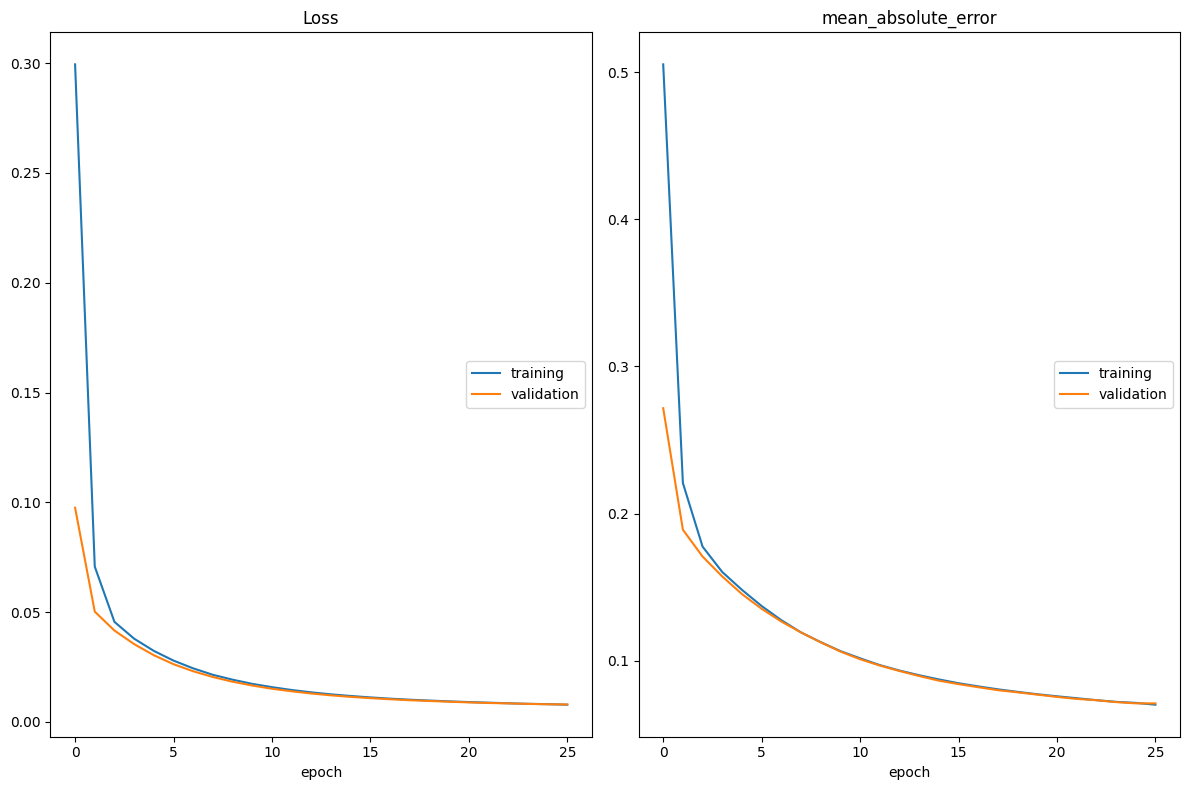

Loss
	training         	 (min:    0.008, max:    0.299, cur:    0.008)
	validation       	 (min:    0.008, max:    0.098, cur:    0.008)
mean_absolute_error
	training         	 (min:    0.070, max:    0.505, cur:    0.070)
	validation       	 (min:    0.071, max:    0.272, cur:    0.071)
11/11 [==============================] - 0s 30ms/step - loss: 0.0078 - mean_absolute_error: 0.0703 - val_loss: 0.0079 - val_mean_absolute_error: 0.0712
Epoch 26: early stopping


In [11]:
# Entrenamiento de la red neuronal con 100 épocas y early stopping
model_2layers.fit(X_train, Y_train, 
          verbose=True, 
          epochs=100,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

5/5 [==============================] - 0s 544us/step
RMSE: 0.08912181519807419
MAE: 0.07116389354864755


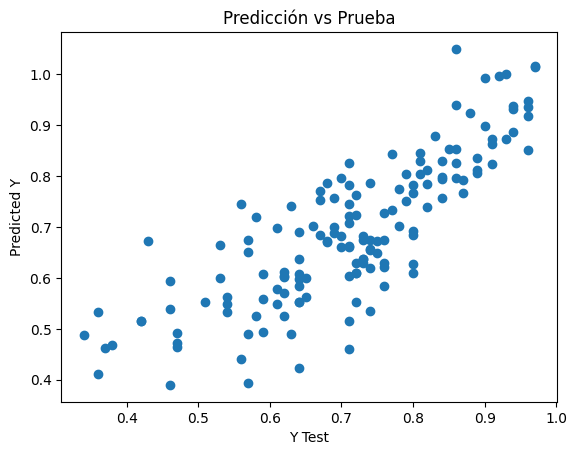

In [12]:
y_pred_2l = model_2layers.predict(X_test)

# Calcular RMSE
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred_2l)))
# Calcular MAE
print('MAE:', mean_absolute_error(Y_test, y_pred_2l))

# Plot predicted vs actual
plt.scatter(Y_test, y_pred_2l)
plt.title('Predicción vs Prueba')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [13]:
# Celda 3
# Red neuronal multicapa
K.clear_session()

# Definición red neuronal con la función Sequential()
model_drop_out = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model_drop_out.add(Dense(100, input_shape=(dims,),activation='relu'))
model_drop_out.add(Dropout(0.2))
model_drop_out.add(Dense(100,activation='relu'))
model_drop_out.add(Dropout(0.2))
model_drop_out.add(Dense(output_var))
model_drop_out.add(Activation('relu'))

# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model_drop_out.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Impresión de la arquitectura de la red neuronal
print(model_drop_out.summary())

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model_drop_out.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 11,001
Trainable params: 11,001
Non-traina

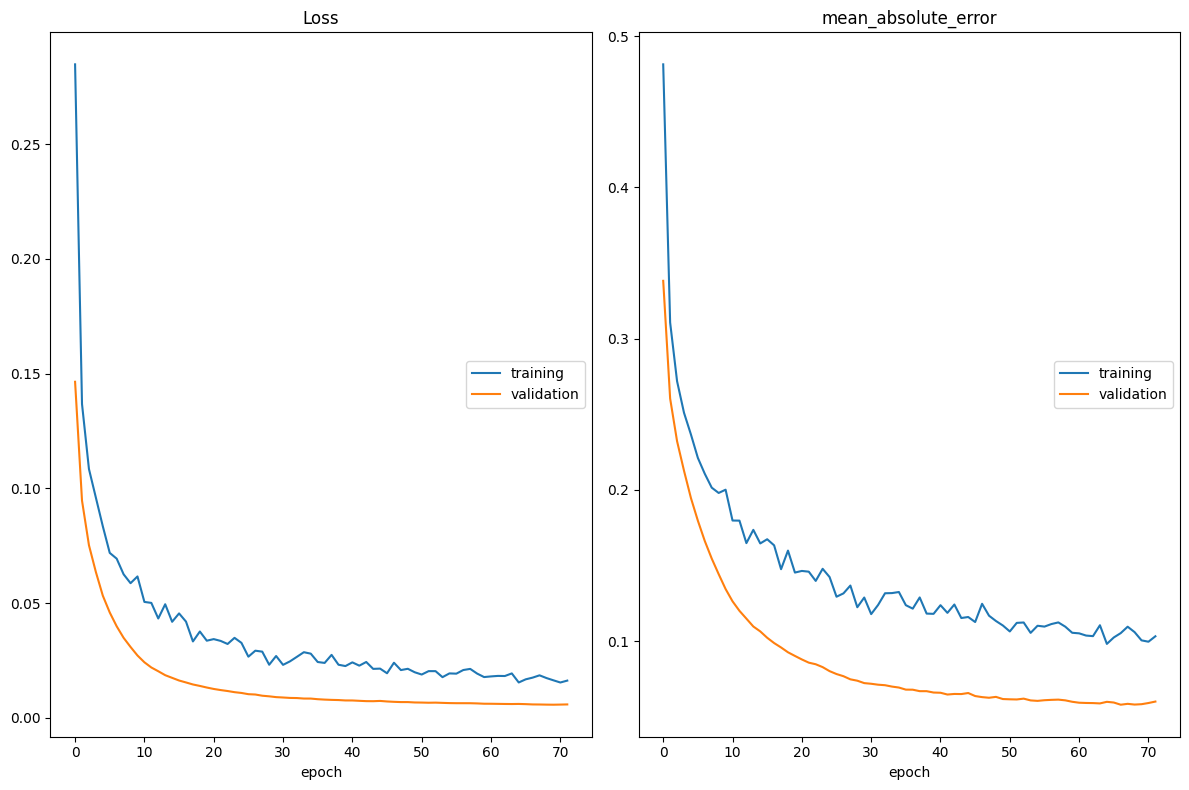

Loss
	training         	 (min:    0.015, max:    0.285, cur:    0.016)
	validation       	 (min:    0.006, max:    0.146, cur:    0.006)
mean_absolute_error
	training         	 (min:    0.098, max:    0.481, cur:    0.103)
	validation       	 (min:    0.058, max:    0.338, cur:    0.060)
11/11 [==============================] - 0s 22ms/step - loss: 0.0162 - mean_absolute_error: 0.1031 - val_loss: 0.0058 - val_mean_absolute_error: 0.0600
Epoch 72: early stopping


In [14]:
# Entrenamiento de la red neuronal con 100 épocas y early stopping y dropout
model_drop_out.fit(X_train, Y_train, 
          verbose=True, 
          epochs=100,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

5/5 [==============================] - 0s 642us/step
RMSE: 0.07644727806017047
MAE: 0.05996829994519552


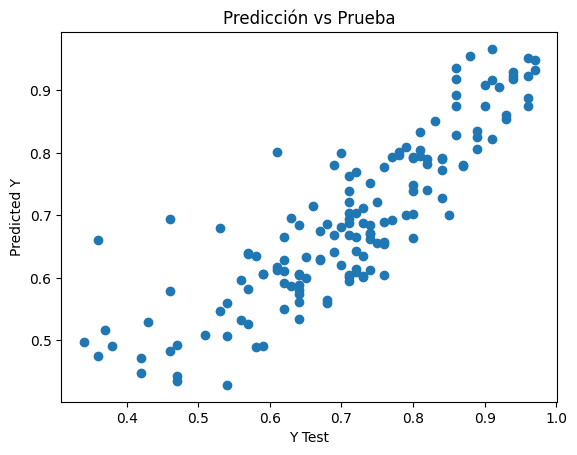

In [15]:
y_pred_drop_out = model_drop_out.predict(X_test)

# Calcular RMSE
print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred_drop_out)))
# Calcular MAE
print('MAE:', mean_absolute_error(Y_test, y_pred_drop_out))

# Plot predicted vs actual
plt.scatter(Y_test, y_pred_drop_out)
plt.title('Predicción vs Prueba')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [16]:
# Celda 4
